In [1]:
'''
List of attributes
1.  Age: continuous
2.  sex: categorical, 2 values {0: female,1: male}
3.  cp (chest pain type): categorical, 4 values
    {1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic }
4.  trestbps (resting blood pressure on admission to the hospital) :continuos (in mmHg) 
5.  chol: serum cholestoral, continuous(in mg/dl)
6.  fbs(fasting blood sugar): categorical, 2 values {0 : <= 120 mg/dl, 1 : > 120 mg/dl}
7.  restecg(resting electrocardiographic): categorical, 3 values 
    {0: normal, 1: having ST-T wave abnormality, 2:  left ventricular hypertrophy}
8.  thalach: (aximum heart rate achieved) ,continuous
9.  exang: (exercise induced angina), 2 values {0: no,1: yes}
10. oldpeak:(ST depression induced by exercise relative to rest), continuous
11. slope: (slope of the peak exercise ST segment), categorical, 3 values
    {1: upsloping, 2: flat, 3: downsloping}
12. ca:(number of major vessels), descrete(0,1,2,3)
13. thal: {3 : normal, 6 :fixed defect,7 :reversable defect}
14. num: (diagnosis of heart disease),categorical, 5 values
    {0: < 50%, 1-4: > 50%}
    
The actual number of features(after converting categorical variables in to dummy variables is
1 (age) + 1 (sex) + 3 (cp) +  1 (trestbps) + 1 (chol) + 1 (fbs) + 2 (restecg) +
1 (thalach) + 1 (exang) + 1 (oldpeak) + 2 (slope) + 1 (ca) + 2(thal) = 18

The response variable is (num) is categorical with 5 values and we don't have the enough data
to predict for each categories. Therefore we will replace the num with 
14. num: (diagnosis of heart disease),categorical, 5 values
    {0: no , 1 : yes}
    
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df= pd.read_csv('heart_disease_all14.csv',index_col = None, na_values= ['NA'])

In [3]:
df.head()

,63.0,1.0,1.0.1,145.0,233.0,1.0.2,2.0,150.0,0.0,2.3,3.0,0.0.1,6.0,0.0.2
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0.0


In [4]:
columns=["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num"]

In [6]:
df= pd.read_csv('heart_disease_all14.csv',sep=',', header= None, names= columns)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0


In [7]:
df.shape

(299, 14)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 14 columns):
age         299 non-null float64
sex         299 non-null float64
cp          299 non-null float64
trestbps    299 non-null float64
chol        299 non-null float64
fbs         299 non-null float64
restecg     299 non-null float64
thalach     299 non-null float64
exang       299 non-null float64
oldpeak     299 non-null float64
slope       299 non-null float64
ca          299 non-null float64
thal        299 non-null float64
num         299 non-null float64
dtypes: float64(14)
memory usage: 32.8 KB


In [25]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,299.000000,299.00000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,54.521739,0.67893,3.163880,131.715719,246.785953,0.143813,0.989967,149.327759,0.331104,1.058528,1.605351,0.672241,4.745819,0.946488
std,9.030264,0.46767,0.964069,17.747751,52.532582,0.351488,0.994903,23.121062,0.471399,1.162769,0.616962,0.937438,1.940977,1.230409
min,29.000000,0.00000,1.000000,94.000000,100.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.00000,3.000000,120.000000,211.000000,0.000000,0.000000,132.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.00000,3.000000,130.000000,242.000000,0.000000,1.000000,152.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.00000,4.000000,140.000000,275.500000,0.000000,2.000000,165.500000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.00000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


## Generating histograms for visualization 

(0.0, 1.0, 0.0, 1.0)

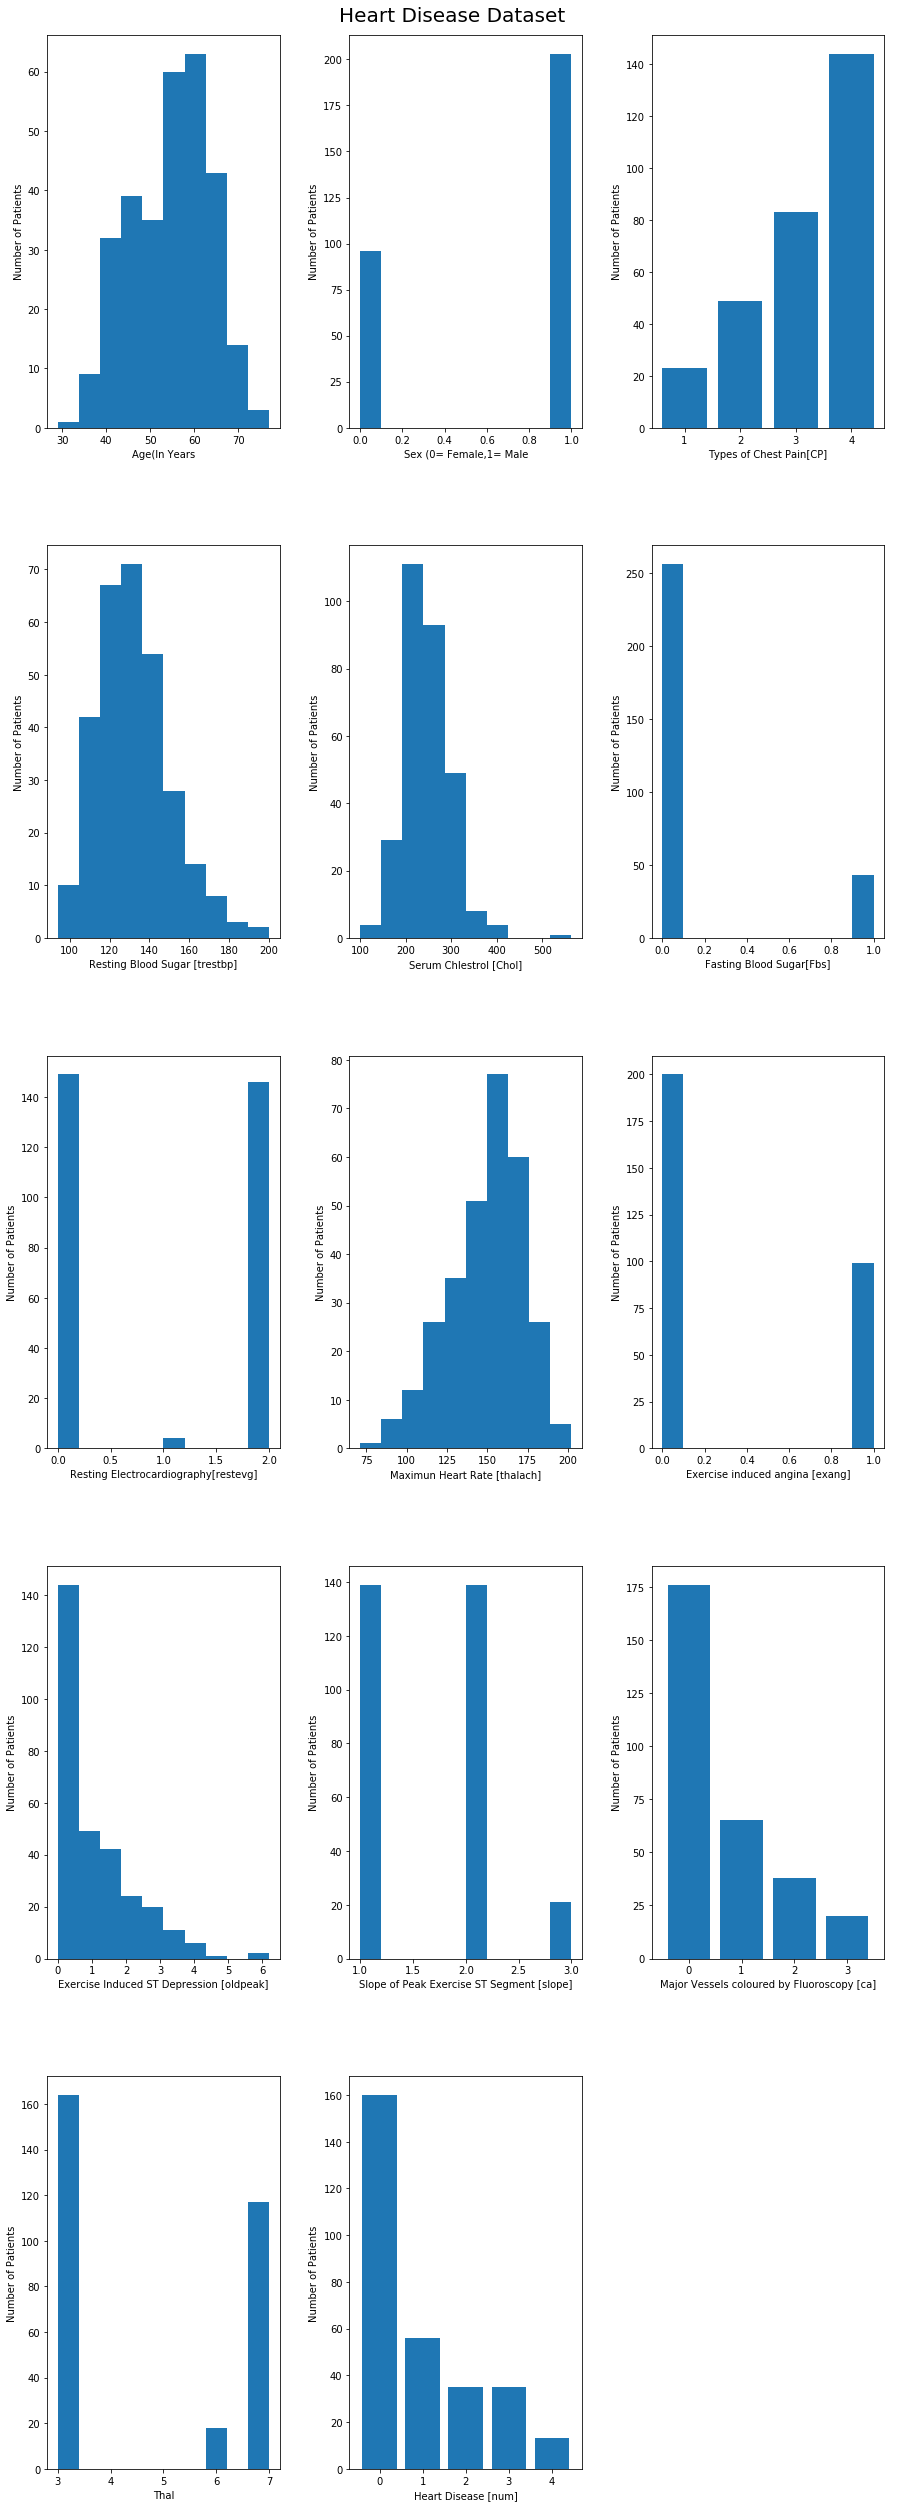

In [26]:
fig,axes= plt.subplots(nrows=5,ncols=3, figsize= (15,40))
plt.subplots_adjust(wspace= 0.3,hspace=0.3,top=0.97)
plt.suptitle("Heart Disease Dataset", fontsize=20)
axes[0,0].hist(df.age)                                               #1
axes[0,0].set_xlabel('Age(In Years') 
axes[0,0].set_ylabel('Number of Patients')
axes[0,1].hist(df.sex)                                               #2
axes[0,1].set_xlabel('Sex (0= Female,1= Male')
axes[0,1].set_ylabel('Number of Patients')
axes[0,2].hist(df.cp, bins= 4, range=(0.5,4.5), rwidth= 0.8)         #3
axes[0,2].set_xlabel('Types of Chest Pain[CP]')
axes[0,2].set_ylabel('Number of Patients')
axes[1,0].hist(df.trestbps)                                           #4
axes[1,0].set_xlabel('Resting Blood Sugar [trestbp]')
axes[1,0].set_ylabel('Number of Patients')
axes[1,1].hist(df.chol)                                              #5
axes[1,1].set_xlabel('Serum Chlestrol [Chol]')
axes[1,1].set_ylabel('Number of Patients')
axes[1,2].hist(df.fbs)                                               #6
axes[1,2].set_xlabel('Fasting Blood Sugar[Fbs]')
axes[1,2].set_ylabel('Number of Patients')
axes[2,0].hist(df.restecg)                                           #7
axes[2,0].set_xlabel('Resting Electrocardiography[restevg]')
axes[2,0].set_ylabel('Number of Patients')
axes[2,1].hist(df.thalach)                                           #8
axes[2,1].set_xlabel('Maximun Heart Rate [thalach]') 
axes[2,1].set_ylabel('Number of Patients')
axes[2,2].hist(df.exang)                                             #9
axes[2,2].set_xlabel('Exercise induced angina [exang]')
axes[2,2].set_ylabel('Number of Patients')
axes[3,0].hist(df.oldpeak)                                           #10
axes[3,0].set_xlabel('Exercise Induced ST Depression [oldpeak]')
axes[3,0].set_ylabel('Number of Patients')
axes[3,1].hist(df.slope)                                             #11
axes[3,1].set_xlabel("Slope of Peak Exercise ST Segment [slope]")
axes[3,1].set_ylabel("Number of Patients")
axes[3,2].hist(df.ca,bins=4,range=(-0.5,3.5),rwidth= 0.8)
axes[3,2].set_xlim(-0.7,3.7)
axes[3,2].set_xlabel("Major Vessels coloured by Fluoroscopy [ca]")
axes[3,2].set_ylabel('Number of Patients')
axes[4,0].hist(df.thal)
axes[4,0].set_xlabel("Thal")
axes[4,0].set_ylabel("Number of Patients")
axes[4,1].hist(df.num, bins=5, range=(-0.5,4.5),rwidth=0.8)
axes[4,1].set_xlim(-0.7,4.7)
axes[4,1].set_xlabel('Heart Disease [num]')
axes[4,1].set_ylabel('Number of Patients')
axes[4,2].axis("off")

C:\Users\Pritam\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Pritam\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Pritam\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Pritam\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Pritam\Anaconda3\lib\site-packages\matplotlib\axes\_axe

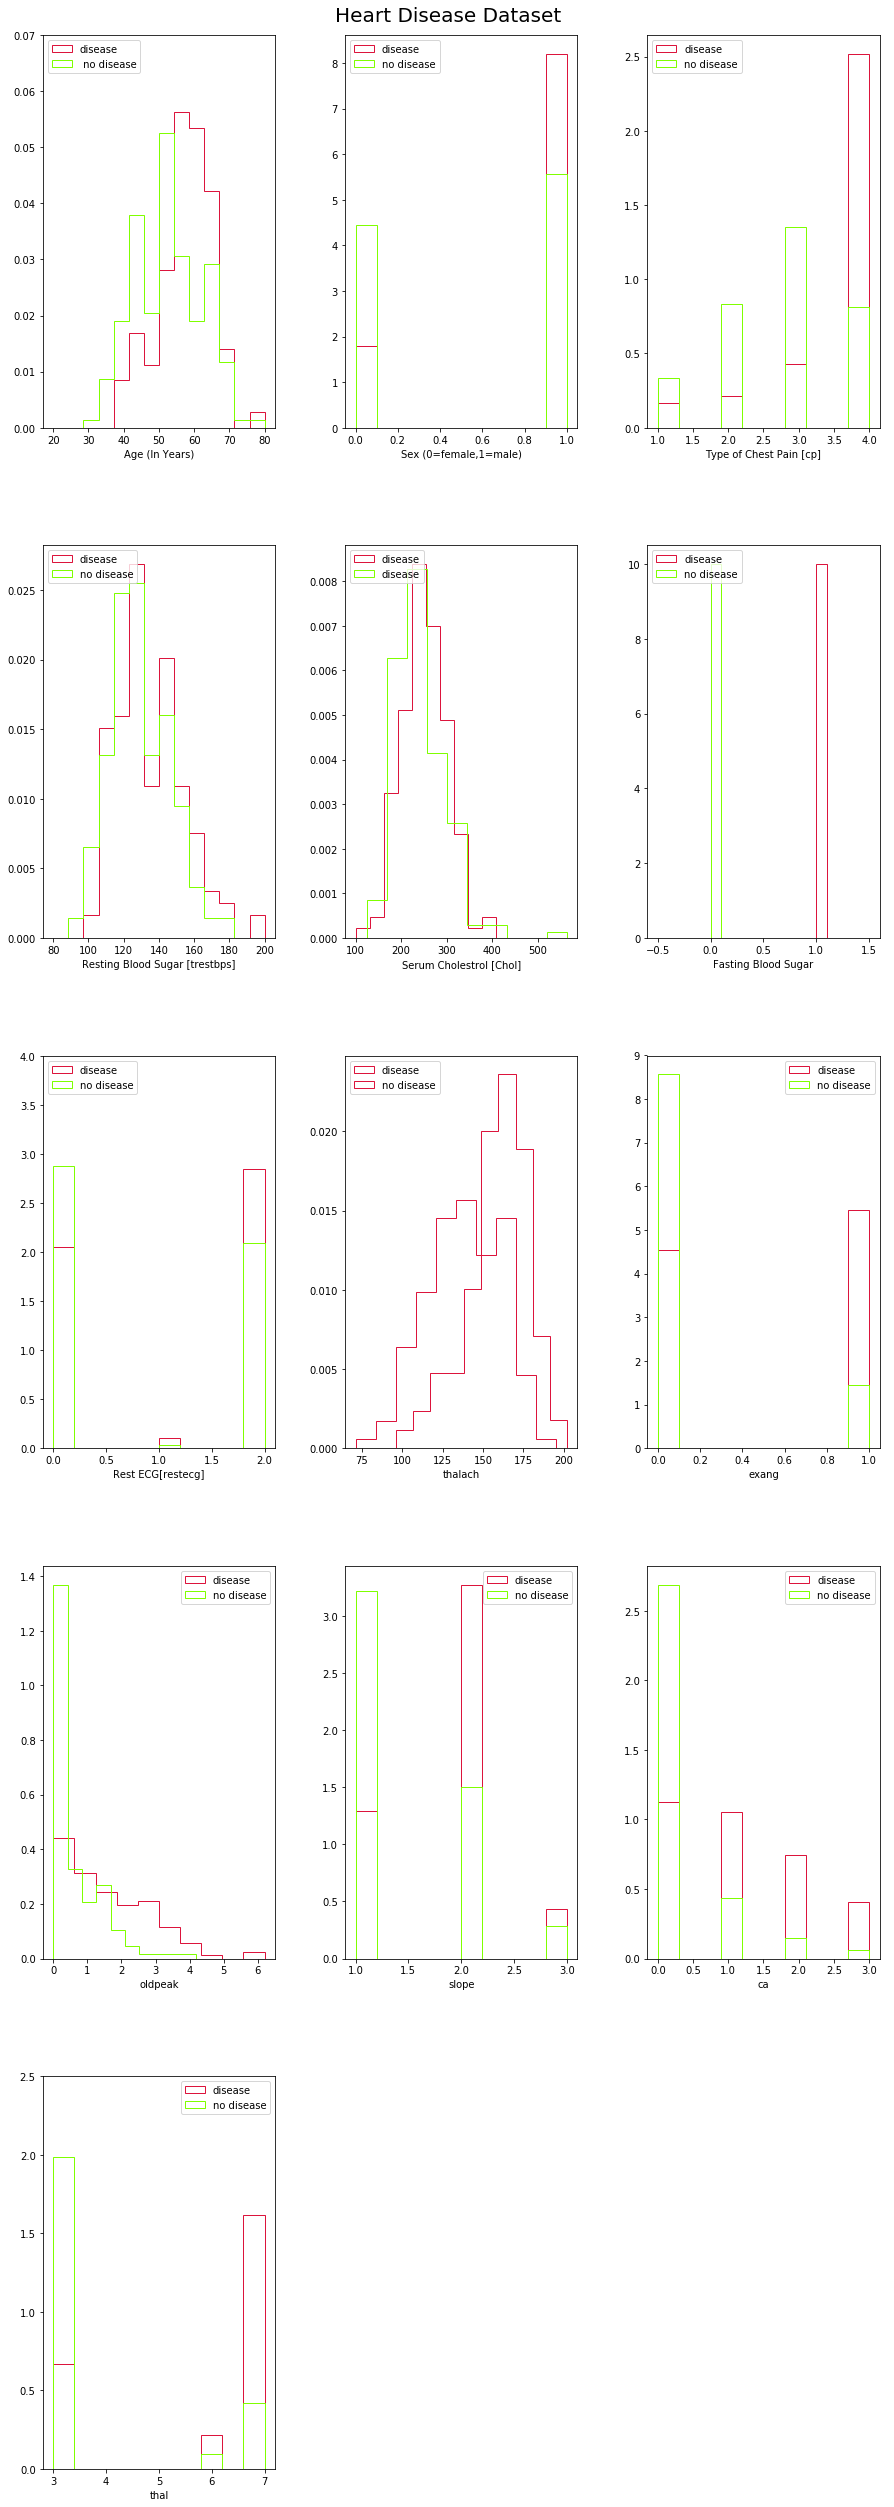

In [27]:
# marginal Feature Distribution for Disease and Not Disease
fig,axes= plt.subplots(nrows=5, ncols=3,figsize=(15,40))
plt.subplots_adjust(wspace=0.3,hspace=0.3,top=0.97)
plt.suptitle('Heart Disease Dataset',fontsize=20)
bins= np.linspace(20,80,15)
axes[0,0].hist(df[df.num>1].age.tolist(),bins,color='crimson',histtype='step',label='disease',normed= True)
axes[0,0].hist(df[df.num==0].age,bins,color='chartreuse',histtype='step',label=' no disease',normed= True)
axes[0,0].set_ylim(0.0,0.070)
axes[0,0].set_xlabel('Age (In Years)')
axes[0,0].legend(prop={'size':10},loc= 'upper left')
axes[0,1].hist(df[df.num>0].sex.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axes[0,1].hist(df[df.num==0].sex,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[0,1].set_xlabel("Sex (0=female,1=male)")
axes[0,1].legend(prop={'size': 10},loc=2)
axes[0,2].hist(df[df.num>0].cp.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axes[0,2].hist(df[df.num==0].cp,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[0,2].set_xlabel("Type of Chest Pain [cp]")
axes[0,2].legend(prop={'size': 10},loc=2)

# 2nd line
bins=np.linspace(80,200,15)
axes[1,0].hist(df[df.num>0].trestbps.tolist(),bins,color=['crimson'],histtype='step',label='disease',normed=True)
axes[1,0].hist(df[df.num==0].trestbps,bins,color=['chartreuse'],histtype='step',label='no disease',normed= True)
axes[1,0].set_xlabel('Resting Blood Sugar [trestbps]')
axes[1,0].legend(prop={'size':10},loc='upper left') 
axes[1,1].hist(df[df.num>0].chol.tolist(),color=['crimson'],histtype='step',label='disease',normed= True)
axes[1,1].hist(df[df.num==0].chol,color=['chartreuse'],histtype='step',label='disease',normed= True)
axes[1,1].set_xlabel('Serum Cholestrol [Chol]')
axes[1,1].legend(prop={'size':10},loc=2)
axes[1,2].hist(df[df.fbs>0].fbs.tolist(),color=['crimson'],histtype='step',label='disease',normed= True)
axes[1,2].hist(df[df.fbs==0].fbs,color=['chartreuse'],histtype='step', label='no disease',normed= True)
axes[1,2].set_xlabel('Fasting Blood Sugar')
axes[1,2].legend(prop={'size':10},loc=2)

#3 line
axes[2,0].hist(df[df.num>0].restecg.tolist(),color=['crimson'],histtype='step',label='disease',normed= True)
axes[2,0].hist(df[df.num==0].restecg, color=['chartreuse'],histtype='step',label='no disease',normed= True)
axes[2,0].set_xlabel('Rest ECG[restecg]')
axes[2,0].set_ylim(0.0,4.0)
axes[2,0].legend(prop={'size':10},loc='upper left')
axes[2,1].hist(df[df.num>0].thalach.tolist(),color=['crimson'],histtype='step',label='disease',normed= True)
axes[2,1].hist(df[df.num==0].thalach,color=['crimson'],histtype='step',label='no disease', normed= True)
axes[2,1].set_xlabel('thalach')
axes[2,1].legend(prop={'size':10},loc=2)
axes[2,2].hist(df[df.num>0].exang.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axes[2,2].hist(df[df.num==0].exang,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[2,2].set_xlabel("exang")
axes[2,2].legend(prop={'size': 10},loc="upper right")

#4th line
axes[3,0].hist(df[df.num>0].oldpeak.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axes[3,0].hist(df[df.num==0].oldpeak,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[3,0].set_xlabel("oldpeak")
axes[3,0].legend(prop={'size': 10},loc="upper right")
axes[3,1].hist(df[df.num>0].slope.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axes[3,1].hist(df[df.num==0].slope,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[3,1].set_xlabel("slope")
axes[3,1].legend(prop={'size': 10},loc="upper right")
axes[3,2].hist(df[df.num>0].ca.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axes[3,2].hist(df[df.num==0].ca,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[3,2].set_xlabel("ca")
axes[3,2].legend(prop={'size': 10},loc="upper right")
axes[4,0].hist(df[df.num>0].thal.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axes[4,0].hist(df[df.num==0].thal,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[4,0].set_xlabel("thal")
axes[4,0].set_xlabel("thal")
axes[4,0].set_ylim(0.0,2.5)
axes[4,0].legend(prop={'size': 10},loc="upper right")
axes[4,1].axis("off")
axes[4,2].axis("off")
plt.show()


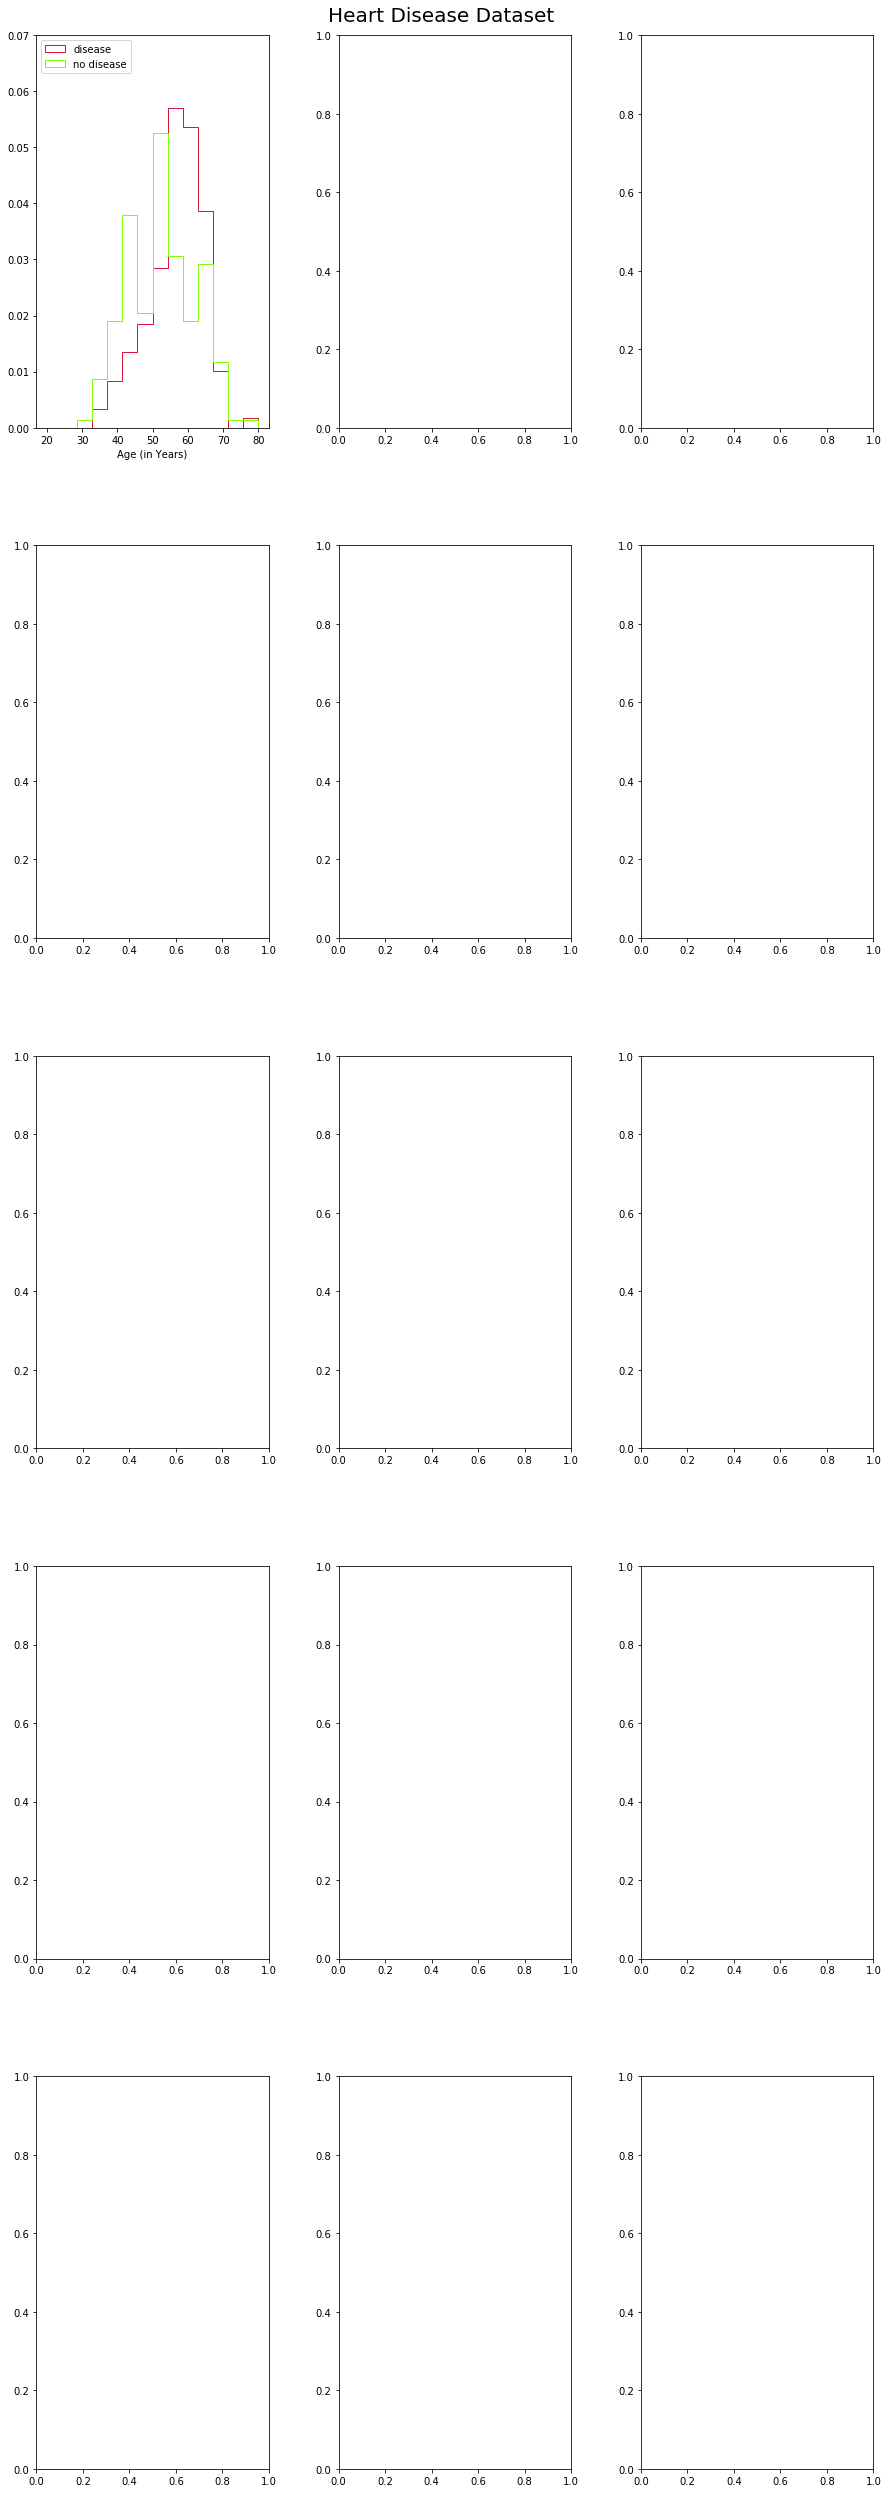

In [11]:
#Marginal Feature Distribution comapared for disease and not-disease
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15,40))
plt.subplots_adjust(wspace=0.30, hspace=0.30, top=0.97)
plt.suptitle("Heart Disease Dataset", fontsize=20)
bins = np.linspace(20,80,15)
axes[0,0].hist(df[df.num>0].age.tolist(),bins,color=["crimson"],histtype="step",label="disease",density=True)
axes[0,0].hist(df[df.num==0].age,bins,color=["chartreuse"],histtype="step",label="no disease",density=True)
axes[0,0].set_xlabel("Age (in Years)")
axes[0,0].set_ylim(0.0,0.070)
axes[0,0].legend(prop={'size': 10},loc="upper left")
plt.show()

In [12]:
# Converting categorical variables into descrete variables
df1 = df.copy()
dummies = pd.get_dummies(df1['cp'], prefix="cp")
df1 = df1.join(dummies)
del df1['cp']
del df1['cp_4.0']
df1=df1.rename(columns={"cp_1.0":"cp_1","cp_2.0":"cp_2","cp_3.0":"cp_3"})

dummies= pd.get_dummies(df1['restecg'],prefix='recg',drop_first=True)
df1= df1.join(dummies)
del df1['restecg']
df1=df1.rename(columns={"recg_1.0":"recg_1","recg_2.0":"recg_2"})


dummies = pd.get_dummies(df1["slope"], prefix="slope")
df1 = df1.join(dummies)
del df1["slope"]
del df1["slope_2.0"]
df1 = df1.rename(columns={"slope_1.0": "slope_1", "slope_3.0": "slope_3"})

dummies = pd.get_dummies(df1["thal"], prefix="thal")
df1 = df1.join(dummies)
del df1["thal"]
del df1["thal_3.0"]
df1 = df1.rename(columns={"thal_6.0": "thal_6", "thal_7.0": "thal_7"})

# Replace response variable and renaming it with hd
# The num variables of 1,2,3,4 are replaced with 1 in order to signify that the patients has heart disease
df1['num'].replace(to_replace=[1,2,3,4],value=1,inplace=True)
df1= df1.rename(columns={'num':'hd'})
new_columns = ["age", "sex", "restbp", "chol", "fbs", "thalach", "exang", "oldpeak", "ca", "hd", "cp_1", "cp_2", "cp_3",
               "recg_1", "recg_2", "slope_1", "slope_3", "thal_6", "thal_7" ]

print('\nNumber of patients in dataframe: %i, with disease: %i, without disease: %i\n' \
      % (len(df1.index),len(df1[df1.hd==1].index),len(df1[df1.hd==0].index)))

print(df1.head())
print(df1.describe())

df1.head()


Number of patients in dataframe: 299, with disease: 139, without disease: 160

    age  sex  trestbps   chol  fbs  thalach  exang  oldpeak   ca   hd  cp_1  \
0  63.0  1.0     145.0  233.0  1.0    150.0    0.0      2.3  0.0  0.0     1   
1  67.0  1.0     160.0  286.0  0.0    108.0    1.0      1.5  3.0  1.0     0   
2  67.0  1.0     120.0  229.0  0.0    129.0    1.0      2.6  2.0  1.0     0   
3  37.0  1.0     130.0  250.0  0.0    187.0    0.0      3.5  0.0  0.0     0   
4  41.0  0.0     130.0  204.0  0.0    172.0    0.0      1.4  0.0  0.0     0   

   cp_2  cp_3  recg_1  recg_2  slope_1  slope_3  thal_6  thal_7  
0     0     0       0       1        0        1       1       0  
1     0     0       0       1        0        0       0       0  
2     0     0       0       1        0        0       0       1  
3     0     1       0       0        0        1       0       0  
4     1     0       0       1        1        0       0       0  
              age        sex    trestbps        c

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,hd,cp_1,cp_2,cp_3,recg_1,recg_2,slope_1,slope_3,thal_6,thal_7
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,0.0,1,0,0,0,1,0,1,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,1.0,0,0,0,0,1,0,0,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,1.0,0,0,0,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0.0,0,0,1,0,0,0,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0.0,0,1,0,0,1,1,0,0,0


In [13]:
#Standardize the dataframe
stdcols = ["age", "trestbps", "chol", "thalach", "oldpeak"]
nrmcols = ["ca"]
stddf = df1.copy()
stddf[stdcols] = stddf[stdcols].apply(lambda x:(x-x.mean())/x.std())
stddf[nrmcols] = stddf[nrmcols].apply(lambda x:(x-x.mean())/(x.max()-x.min()))


stddf.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,hd,cp_1,cp_2,cp_3,recg_1,recg_2,slope_1,slope_3,thal_6,thal_7
0,0.938872,1.0,0.748505,-0.262427,1.0,0.029075,0.0,1.067685,-0.224080,0.0,1,0,0,0,1,0,1,1,0
1,1.381827,1.0,1.593683,0.746471,0.0,-1.787451,1.0,0.379672,0.775920,1.0,0,0,0,0,1,0,0,0,0
2,1.381827,1.0,-0.660124,-0.338570,0.0,-0.879188,1.0,1.325690,0.442586,1.0,0,0,0,0,1,0,0,0,1
3,-1.940335,1.0,-0.096672,0.061182,0.0,1.629347,0.0,2.099704,-0.224080,0.0,0,0,1,0,0,0,1,0,0
4,-1.497380,0.0,-0.096672,-0.814465,0.0,0.980588,0.0,0.293671,-0.224080,0.0,0,1,0,0,1,1,0,0,0


In [14]:
new_columns_1 = new_columns[9:] + new_columns[10:]

new_columns_1

['hd',
 'cp_1',
 'cp_2',
 'cp_3',
 'recg_1',
 'recg_2',
 'slope_1',
 'slope_3',
 'thal_6',
 'thal_7',
 'cp_1',
 'cp_2',
 'cp_3',
 'recg_1',
 'recg_2',
 'slope_1',
 'slope_3',
 'thal_6',
 'thal_7']

In [15]:
new_columns_1.insert(0,new_columns[9])
new_columns_1

['hd',
 'hd',
 'cp_1',
 'cp_2',
 'cp_3',
 'recg_1',
 'recg_2',
 'slope_1',
 'slope_3',
 'thal_6',
 'thal_7',
 'cp_1',
 'cp_2',
 'cp_3',
 'recg_1',
 'recg_2',
 'slope_1',
 'slope_3',
 'thal_6',
 'thal_7']

In [16]:
stddf = stddf.reindex(columns=new_columns_1)
stddf.head()

,hd,hd,cp_1,cp_2,cp_3,recg_1,recg_2,slope_1,slope_3,thal_6,thal_7,cp_1,cp_2,cp_3,recg_1,recg_2,slope_1,slope_3,thal_6,thal_7
0,0.0,0.0,1,0,0,0,1,0,1,1,0,1,0,0,0,1,0,1,1,0
1,1.0,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1.0,1.0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1
3,0.0,0.0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
4,0.0,0.0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0


In [17]:
#Converting into lists to be used by classifer
X_all = stddf[new_columns_1[1:]].values

In [ ]:
plt.subplots(nrows=4,ncols=4,figsize=(20,20))
plt.subplots_adjust(wspace=0.,hspace=0.6,top=0.955)
plt.suptitle('Heart Disease Dataset',fontsize=20)

bins=np.linspace(20,80,15)
plt.hist(df[df>0].age.tolist(),bins,color=['crimson'],histtype=step, label='disease',density=True)
plt.hist(df[df==0].age,bins,color=['chartreuse'],histtype=step,label='no disease', density= True)
plt.set_xlabel('Age (In Years)')
plt.set_ylim(0.0,0.08)
plt.legend(prop={'size':15},loc='upper left')

bins=  np.arange(2)
width= 0.5
